<div class="alert alert-info">
<h1><center><font color=darkblue> ''Machine learning model to determine the recovery of patients with disorders of consciousness'' <font></center></h1>


</div>

In [1]:
pwd

'/Users/fernandomarquez/Documents/Fleni/Investigacion/Modelo EMCS/Modelo 3 - Mes1/repo_modelo_crs'

In [2]:
#Carga de las librerías y datasets utilizados
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")


df= pd.read_excel('/Users/fernandomarquez/Documents/Fleni/Investigacion/Modelo EMCS/Modelo 3 - Mes1/repo_modelo_crs/df_git.xlsx')

<div class="alert alert-info">
<h1><center><font color=darkblue> Preprocessing and Data Exploration <font></center></h1>


</div>

# Drop duplicates

In [4]:
#Sort by best CRS T and drop duplicates pacients
df=df.sort_values(by=['NHC','JFK_T']).drop_duplicates(subset=['NHC'], keep='last', inplace=False)
df.shape

(90, 96)

# DF profile

In [5]:
#import pandas_profiling
#import matplotlib.gridspec as gridspec
#import ipywidgets as widgets
#from ipywidgets import GridspecLayout
#report = pandas_profiling.ProfileReport(df)
#report.to_file("profile.html")

# Table 1

In [6]:
from tableone import TableOne
#https://github.com/tompollard/tableone/blob/master/tableone.ipynb

data=df

# columns to summarize
columns = ['improbable30','edad', 'edad_map', 'edad_map1',
           'genero', 'etiologia','evolucion','conciencia_i', 
           'LOS', 'seguimiento',
           'CRSi_A', 'CRSi_V', 'CRSi_M', 'CRSi_Ve', 'CRSi_C', 'CRSi_Ar','CRSi_T',
           'JFK_A', 'JFK_V', 'JFK_M', 'JFK_Ve', 'JFK_C', 'JFK_Ar','JFK_T',
           #'CRSe_A', 'CRSe_V', 'CRSe_M', 'CRSe_Ve','CRSe_C', 'CRSe_Ar', 'CRSe_T', 
           'conciencia_e', 
           'variacion_CRS_T', 'variacion_CRS_A','variacion_CRS_V', 'variacion_CRS_C', 'variacion_CRS_Ar',
           'variacion_CRS_M', 'variacion_CRS_Ve',
           'vel_var_CRS_A','vel_var_CRS_V', 'vel_var_CRS_C', 'vel_var_CRS_Ar', 'vel_var_CRS_M','vel_var_CRS_Ve',
           'vel_var_CRS',#'improbable30',
 #          'Improbable1','Improbable2', 'Improbable3', 'Improbable4', 'Improbable5','Improbable6', 'Improbable7', 
  #         'Improbable8', 'Improbable9','Improbable10', 'Improbable11', 'Improbable12', 'Improbable13','Improbable14',
   #        'Improbable15', 'Improbable16', 'Improbable17','Improbable18', 'Improbable19', 'Improbable20', 
    #       'Improbable21','Improbable22', 'Improbable23', 'Improbable24', 'Improbable25','Improbable26', 
     #      'Improbable27', 'Improbable28', 'Improbable29','Improbable30', 'Improbable31', 'Improbable32', 
      #     'Improbable33','Improbable34', 'Improbable35', 'Improbable36', 
           'EMERGENCIA']

# columns containing categorical variables
categorical = ['genero', 'etiologia', 'conciencia_i', 'conciencia_e', 'EMERGENCIA','edad_map', 'edad_map1',
               'improbable30']

# non-normal variables
nonnormal = ['edad', 'evolucion','LOS', 'CRSi_A', 'CRSi_V', 'CRSi_M', 'CRSi_Ve', 'CRSi_C', 'CRSi_Ar','CRSi_T', 
             'JFK_A', 'JFK_V', 'JFK_M', 'JFK_Ve', 'JFK_C', 'JFK_Ar','JFK_T',
             #'CRSe_A', 'CRSe_V', 'CRSe_M', 'CRSe_Ve', 'CRSe_C', 'CRSe_Ar','CRSe_T', 'seguimiento', 
             'variacion_CRS_T', 'variacion_CRS_A','variacion_CRS_V', 'variacion_CRS_C', 'variacion_CRS_Ar',
             'variacion_CRS_M', 'variacion_CRS_Ve', 
             'vel_var_CRS', 'vel_var_CRS_A', 'vel_var_CRS_V','vel_var_CRS_C', 'vel_var_CRS_Ar', 'vel_var_CRS_M', 
             'vel_var_CRS_Ve']

# limit the binary variable "death" to a single row
#limit = {"EMERGENCIA": 1}

# set the order of the categorical variables
#order = {"ICU": ["MICU", "SICU", "CSRU", "CCU"],
 #        "death": ["1"]}

# alternative labels
labels={'genero':'Género', 
        'etiologia':'Etiología',
        'conciencia_i':'Diagnóstico al ingreso',
        'conciencia_e':'Diagnóstico al egreso',
        'edad':'Edad', 
        'edad_map':'Edad mayor a 30 años', 
        'edad_map1':'Edad mayor a 50 años',
        'evolucion':'Evolución (días)', 
        'seguimiento':'Seguimiento (días)',
        'LOS':'Tiempo desde el ingreso al alta del prote (días)',
        'CRSi_A':'CRS-R Auditiva inicial',
        'CRSi_V':'CRS-R Visual inicial', 
        'CRSi_M':'CRS-R Motor inicial', 
        'CRSi_Ve':'CRS-R Verbal-Oromotor inicial', 
        'CRSi_C':'CRS-R Comunicación inicial', 
        'CRSi_Ar':'CRS-R Vigilia inicial', 
        'CRSi_T':'CRS-R Total inicial',
        'JFK_A':'CRS-R Auditiva al mes', 
        'JFK_V':'CRS-R Visual al mes', 
        'JFK_M':'CRS-R Motor al mes',
        'JFK_Ve':'CRS-R Verbal-Oromotor al mes', 
        'JFK_C':'CRS-R Comunicación al mes', 
        'JFK_Ar':'CRS-R Vigilia al mes',
        'JFK_T':'CRS-R Total al mes',
        'CRSe_A':'CRS-R Auditiva final',
        'CRSe_V':'CRS-R Visual final', 
        'CRSe_M':'CRS-R Motor final', 
        'CRSe_Ve':'CRS-R Verbal-Oromotor final', 
        'CRSe_C':'CRS-R Comunicación final', 
        'CRSe_Ar':'CRS-R Vigilia final', 
        'CRSe_T':'CRS-R Total final',
        'variacion_CRS_T':'Variación CRS-R Total (final-inicial)',
        'variacion_CRS_A':'Variación CRS-R Auditiva',
        'variacion_CRS_V':'Variación CRS-R Visual', 
        'variacion_CRS_C':'Variación CRS-R Comunicación', 
        'variacion_CRS_Ar':'Variación CRS-R Vigilia',
        'variacion_CRS_M':'Variación CRS-R Motor', 
        'variacion_CRS_Ve':'Variación CRS-R Verbal-Oromotor',
        'vel_var_CRS':'Tasa de variación CRS-R Total',
        'vel_var_CRS_A':'Tasa de variación CRS-R',
        'vel_var_CRS_V':'Tasa de variación CRS-R Visual',
        'vel_var_CRS_C':'Tasa de variación CRS-R Comunicación',
        'vel_var_CRS_Ar':'Tasa de variación CRS-R Vigilia',
        'vel_var_CRS_M':'Tasa de variación CRS-R Motor',
        'vel_var_CRS_Ve':'Tasa de variación CRS-R Verbal-Oromotor',
        'improbable30': 'Combinación improbable a los 30 días', 
        'improbable60': 'Combinación improbable a los 60 días',
        'improbable90': 'Combinación improbable a los 90 días',
        'EMERGENCIA': 'Recuperacion de la conciencia'}

# set decimal places for age to 0
decimals = {'sexo_TO':0,'dx1':0,'DOCingreso':0,'edad_TO':0,'tiempo_lesion_ingreso':0,'tiempo_primerJFK_ultimaJFK':0,
            'JFK_A':0,'JFK_V':0,'JFK_M':0,'JFK_Ve':0,'JFK_C':0,'JFK_Ar':0,'JFK_T':0,'JFK_T_ultima':0,'rappaport_i':0,
            'RLA_i':0,'variacion_JFKe_JFKi':0,'vel_var_JFK':0}

# optionally, a categorical variable for stratification
groupby = ['EMERGENCIA']

# create tableone with the input arguments
tabla_totales = TableOne(data, columns=columns, categorical=categorical, 
                   nonnormal=nonnormal, rename=labels, label_suffix=True, 
                   decimals=decimals, #limit=limit
                        )#, order=order)

tabla_totales

Missing             Overall
n                                                                                  90
Combinación improbable a los 30 días, n (%)        0            0           82 (91.1)
                                                   1                          8 (8.9)
Edad, median [Q1,Q3]                                            0    36.0 [27.0,54.5]
Edad mayor a 30 años, n (%)                        0            0           28 (31.1)
                                                   1                        62 (68.9)
Edad mayor a 50 años, n (%)                        0            0           61 (67.8)
                                                   1                        29 (32.2)
Género, n (%)                                      F            0           28 (31.1)
                                                   M                        62 (68.9)
Etiología, n (%)                                   ACV          5           18 (21.2)
                                                   Anoxia                   20 (23.5)
                                                   TEC                      46 (54.1)
                                                   Tumor                      1 (1.2)
Evolución (días), median [Q1,Q3]                                0   79.5 [44.2,132.0]
Diagnóstico al ingreso, n (%)                      MC           0           30 (33.3)
                                                   SVSR                     60 (66.7)
Tiempo desde el ingreso al alta del prote (días...              0  138.5 [78.0,209.8]
Seguimiento (días), mean (SD)                                   0          23.8 (5.6)
CRS-R Auditiva inicial, median [Q1,Q3]                          0       1.0 [0.0,1.0]
CRS-R Visual inicial, median [Q1,Q3]                            0       0.0 [0.0,2.8]
CRS-R Motor inicial, median [Q1,Q3]                             0       2.0 [1.0,2.0]
CRS-R Verbal-Oromotor inicial, median [Q1,Q3]                   0       1.0 [0.2,1.0]
CRS-R Comunicación inicial, median [Q1,Q3]                      0       0.0 [0.0,0.0]
CRS-R Vigilia inicial, median [Q1,Q3]                           0       1.0 [1.0,2.0]
CRS-R Total inicial, median [Q1,Q3]                             0       5.0 [4.0,7.0]
CRS-R Auditiva al mes, median [Q1,Q3]                           0             1 [1,2]
CRS-R Visual al mes, median [Q1,Q3]                             0             2 [0,3]
CRS-R Motor al mes, median [Q1,Q3]                              0             2 [2,4]
CRS-R Verbal-Oromotor al mes, median [Q1,Q3]                    0             1 [1,1]
CRS-R Comunicación al mes, median [Q1,Q3]                       0             0 [0,0]
CRS-R Vigilia al mes, median [Q1,Q3]                            0             2 [2,2]
CRS-R Total al mes, median [Q1,Q3]                              0            8 [6,12]
Diagnóstico al egreso, n (%)                       EMCS         1           23 (25.8)
                                                   MC                       27 (30.3)
                                                   SVSR                     39 (43.8)
Variación CRS-R Total (final-inicial), median [...              0       2.5 [1.0,4.0]
Variación CRS-R Auditiva, median [Q1,Q3]                        0       0.0 [0.0,1.0]
Variación CRS-R Visual, median [Q1,Q3]                          0       0.0 [0.0,2.0]
Variación CRS-R Comunicación, median [Q1,Q3]                    0       0.0 [0.0,0.0]
Variación CRS-R Vigilia, median [Q1,Q3]                         0       0.0 [0.0,1.0]
Variación CRS-R Motor, median [Q1,Q3]                           0       0.0 [0.0,1.0]
Variación CRS-R Verbal-Oromotor, median [Q1,Q3]                 0       0.0 [0.0,1.0]
Tasa de variación CRS-R, median [Q1,Q3]                         0       0.0 [0.0,0.1]
Tasa de variación CRS-R Visual, median [Q1,Q3]                  0       0.0 [0.0,0.1]
Tasa de variación CRS-R Comunicación, median [Q...              0       0.0 [0.0,0.0]
Tasa de variació

In [7]:
# create grouped_table with p values
grouped_table = TableOne(data, columns, categorical, groupby, 
                         nonnormal, labels=labels, decimals=decimals, label_suffix=True, pval = True)
#grouped_table.to_excel('tabla1_grupos.xlsx')
grouped_table

/anaconda3/lib/python3.7/site-packages/tableone.py:119: DeprecationWarning: The labels argument is deprecated; use rename instead.
  "rename instead.", DeprecationWarning)


Grouped by Recuperacion de la conciencia                                                                                          
                                                                                           Missing                   0                  1 P-Value                                       Test
n                                                                                                                   67                 23                                                   
Combinación improbable a los 30 días, n (%)        0                                             0           64 (95.5)          18 (78.3)   0.024                             Fisher's exact
                                                   1                                                           3 (4.5)           5 (21.7)                                                   
Edad, median [Q1,Q3]                                                                             0    37.0 [27.0,60.0]   35.0 [25.5,43.5]   0.158                             Kruskal-Wallis
Edad mayor a 30 años, n (%)                        0                                             0           19 (28.4)           9 (39.1)   0.483                                Chi-squared
                                                   1                                                         48 (71.6)          14 (60.9)                                                   
Edad mayor a 50 años, n (%)                        0                                             0           42 (62.7)          19 (82.6)   0.132                                Chi-squared
                                                   1                                                         25 (37.3)           4 (17.4)                                                   
Género, n (%)                                      F                                             0           22 (32.8)           6 (26.1)   0.732                                Chi-squared
                                                   M                                                         45 (67.2)          17 (73.9)                                                   
Etiología, n (%)                                   ACV                                           5           16 (25.8)            2 (8.7)   0.075  Chi-squared (warning: expected count < 5)
                                                   Anoxia                                                    16 (25.8)           4 (17.4)                                                   
                                                   TEC                                                       30 (48.4)          16 (69.6)                                                   
                                                   Tumor                                                                          1 (4.3)                                                   
Evolución (días), median [Q1,Q3]                                                                 0   86.0 [51.5,144.0]  54.0 [38.0,101.0]   0.054                             Kruskal-Wallis
Diagnóstico al ingreso, n (%)                      MC                                            0           14 (20.9)          16 (69.6)  <0.001                                Chi-squared
                                                   SVSR                                                      53 (79.1)           7 (30.4)                                                   
Tiempo desde el ingreso al alta del prote (días...                                               0  156.0 [94.0,213.5]  77.0 [40.5,144.5]   0.003                             Kruskal-Wallis
Seguimiento (días), mean (SD)                                                                    0          23.7 (5.7)         23.9 (5.4)   0.892                          Two Sample T-test
CRS-R Auditiva inicial, median [Q1,Q3]                                                   

# Exploration

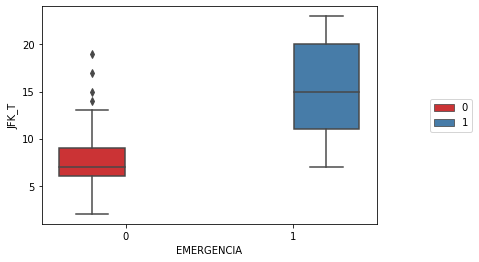

In [8]:
# Grouped boxplot
ax=sns.boxplot(x="EMERGENCIA", y="JFK_T", hue="EMERGENCIA", data=df, palette="Set1")
#sns.plt.show()
ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

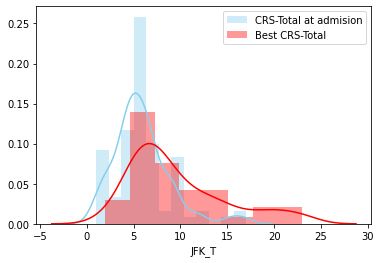

In [10]:
# Method 1: on the same Axis
sns.distplot( df["CRSi_T"] , color="skyblue", label="CRS-Total at admision")
sns.distplot( df["JFK_T"] , color="red", label="Best CRS-Total")
plt.legend()

In [11]:
df_pairplot=df[['edad','evolucion',
                'CRSi_A', 'CRSi_V', 'CRSi_M', 'CRSi_Ve', 'CRSi_C', 'CRSi_Ar','CRSi_T',
      #          'JFK_A', 'JFK_V', 'JFK_M','JFK_Ve', 'JFK_C', 'JFK_Ar', 'JFK_T',
     #           'variacion_CRS_A', 'variacion_CRS_V', 'variacion_CRS_C','variacion_CRS_Ar', 
    #            'variacion_CRS_M', 'variacion_CRS_Ve','variacion_CRS_T',
                'EMERGENCIA']]
#sns_plot=sns.pairplot(df_pairplot, hue="EMERGENCIA", markers=["o", "s"])

#sns_plot.savefig("pairplot.png")

In [12]:
df_pairplot2=df[[#'edad','evolucion',
                #'CRSi_A', 'CRSi_V', 'CRSi_M', 'CRSi_Ve', 'CRSi_C', 'CRSi_Ar','CRSi_T',
                'JFK_A', 'JFK_V', 'JFK_M','JFK_Ve', 'JFK_C', 'JFK_Ar', 'JFK_T',
                'variacion_CRS_A', 'variacion_CRS_V', 'variacion_CRS_C','variacion_CRS_Ar', 
                'variacion_CRS_M', 'variacion_CRS_Ve','variacion_CRS_T',
                'EMERGENCIA']]
#sns_plot=sns.pairplot(df_pairplot2, hue="EMERGENCIA", markers=["o", "s"])

#sns_plot.savefig("pairplot.png")

# Get dummies

In [13]:
#Get dummies
df=pd.get_dummies(data=df, columns=['conciencia_i','genero', 'etiologia'], prefix = 'cat', drop_first=True)

# Rename cols

In [14]:
#Dict to rename cols
dict_cols= {'CRSi_A':'CRSiA', 'CRSi_V':'CRSiV','CRSi_M':'CRSiM', 'CRSi_Ve':'CRSiVe', 'CRSi_C':'CRSiC', 
            'CRSi_Ar':'CRSiAr','CRSi_T':'CRSiT'}
#Rename cols
df=df.rename(columns=dict_cols)

<div class="alert alert-info">
<h1><center><font color=darkblue> Future Engineering <font></center></h1>


</div>

# NF75 (n=75) 
### All features
All features of dataset

In [15]:
NF75=df[['edad','edad_map','edad_map1', 'evolucion','seguimiento','cat_SVSR', 'cat_M', 
          'cat_Anoxia', 'cat_TEC','cat_Tumor',
          'CRSiA', 'CRSiV', 'CRSiM', 'CRSiVe', 'CRSiC', 'CRSiAr','CRSiT', 
          'JFK_A', 'JFK_V', 'JFK_M','JFK_Ve', 'JFK_C', 'JFK_Ar', 'JFK_T',
          'variacion_CRS_A', 'variacion_CRS_V', 'variacion_CRS_C','variacion_CRS_Ar', 'variacion_CRS_M', 
          'variacion_CRS_Ve','variacion_CRS_T',
          'vel_var_CRS_A', 'vel_var_CRS_V', 'vel_var_CRS_C','vel_var_CRS_Ar', 'vel_var_CRS_M','vel_var_CRS_Ve',
          'vel_var_CRS', 
          'improbable30',
          'Improbable1','Improbable2', 'Improbable3', 'Improbable4', 'Improbable5','Improbable6', 'Improbable7', 
          'Improbable8', 'Improbable9','Improbable10', 'Improbable11', 'Improbable12', 'Improbable13','Improbable14',
          'Improbable15', 'Improbable16', 'Improbable17','Improbable18', 'Improbable19', 'Improbable20', 
          'Improbable21','Improbable22', 'Improbable23', 'Improbable24', 'Improbable25','Improbable26', 
          'Improbable27', 'Improbable28', 'Improbable29','Improbable30', 'Improbable31', 'Improbable32', 
          'Improbable33','Improbable34', 'Improbable35', 'Improbable36']]
NF75.shape

(90, 75)

# NF52 (n=52) 
### Medical criteria selection 1 n=52

Elimination of improbable conditions with 0 observations

In [16]:
imp1=df[['Improbable1','Improbable2', 'Improbable3', 'Improbable4', 'Improbable5','Improbable6', 'Improbable7', 
          'Improbable8', 'Improbable9','Improbable10', 'Improbable11', 'Improbable12', 'Improbable13','Improbable14',
          'Improbable15', 'Improbable16', 'Improbable17','Improbable18', 'Improbable19', 'Improbable20', 
          'Improbable21','Improbable22', 'Improbable23', 'Improbable24', 'Improbable25','Improbable26', 
          'Improbable27', 'Improbable28', 'Improbable29','Improbable30', 'Improbable31', 'Improbable32', 
          'Improbable33','Improbable34', 'Improbable35', 'Improbable36', ]].describe().T
imp1.loc[imp1['max'] < 0.1].T.columns

Index(['Improbable1', 'Improbable2', 'Improbable3', 'Improbable4',
       'Improbable5', 'Improbable6', 'Improbable7', 'Improbable8',
       'Improbable9', 'Improbable10', 'Improbable11', 'Improbable12',
       'Improbable13', 'Improbable14', 'Improbable15', 'Improbable16',
       'Improbable17', 'Improbable18', 'Improbable21', 'Improbable22',
       'Improbable27', 'Improbable28', 'Improbable32'],
      dtype='object')

In [17]:
#Select cols to drop
cols_drop=['Improbable1', 'Improbable2', 'Improbable3', 'Improbable4','Improbable5', 'Improbable6', 'Improbable7', 
           'Improbable8','Improbable9', 'Improbable10', 'Improbable11', 'Improbable12','Improbable13', 'Improbable14',
           'Improbable15', 'Improbable16','Improbable17', 'Improbable18', 'Improbable21', 'Improbable22',
           'Improbable27', 'Improbable28', 'Improbable32']
#Drop selected cols
NF52 = NF75.drop(cols_drop, 1)
NF52.shape

(90, 52)

In [18]:
#corr=NF52.join(df.EMERGENCIA)
#f,ax = plt.subplots(figsize=(20, 12))
#plt.title('Correlación entre variables', y=1.05, size=15)
#sns.heatmap(corr.corr(method='spearman'), annot=True, square=True,linewidths=.5, fmt='.1f',ax=ax)

# NF46 n=46 
### Recursive Feature Elimination with Random Forrest and Cross Validation of NF75

In [19]:
X=NF75
y=df[['EMERGENCIA']]

In [20]:
from sklearn.model_selection import train_test_split
# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf = RandomForestClassifier(random_state=42,max_depth=5) 
rfecv = RFECV(estimator=clf_rf, step=1, cv=5,scoring='balanced_accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 46
Best features : Index(['edad', 'edad_map', 'edad_map1', 'evolucion', 'seguimiento', 'cat_SVSR',
       'cat_M', 'cat_Anoxia', 'cat_TEC', 'cat_Tumor', 'CRSiA', 'CRSiV',
       'CRSiM', 'CRSiVe', 'CRSiC', 'CRSiAr', 'CRSiT', 'JFK_A', 'JFK_V',
       'JFK_M', 'JFK_Ve', 'JFK_C', 'JFK_Ar', 'JFK_T', 'variacion_CRS_A',
       'variacion_CRS_V', 'variacion_CRS_C', 'variacion_CRS_Ar',
       'variacion_CRS_M', 'variacion_CRS_Ve', 'variacion_CRS_T',
       'vel_var_CRS_A', 'vel_var_CRS_V', 'vel_var_CRS_C', 'vel_var_CRS_Ar',
       'vel_var_CRS_M', 'vel_var_CRS_Ve', 'vel_var_CRS', 'improbable30',
       'Improbable1', 'Improbable2', 'Improbable3', 'Improbable4',
       'Improbable15', 'Improbable18', 'Improbable20'],
      dtype='object')


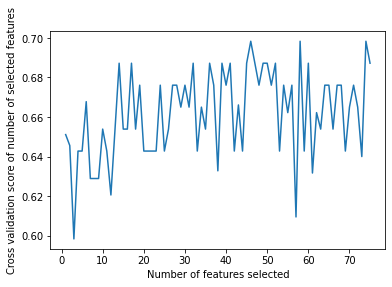

In [21]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Feature ranking:
1. feature 32 (0.068976)
2. feature 19 (0.068779)
3. feature 23 (0.064440)
4. feature 16 (0.055077)
5. feature 30 (0.054022)
6. feature 37 (0.050592)
7. feature 11 (0.050094)
8. feature 18 (0.049042)
9. feature 20 (0.038771)
10. feature 4 (0.033569)
11. feature 3 (0.032147)
12. feature 0 (0.031732)
13. feature 34 (0.030011)
14. feature 25 (0.029425)
15. feature 28 (0.029105)
16. feature 12 (0.028366)
17. feature 21 (0.027024)
18. feature 31 (0.025263)
19. feature 5 (0.025083)
20. feature 8 (0.022466)
21. feature 17 (0.019787)
22. feature 36 (0.019606)
23. feature 35 (0.019602)
24. feature 24 (0.018152)
25. feature 10 (0.017950)
26. feature 29 (0.017331)
27. feature 22 (0.012355)
28. feature 1 (0.009532)
29. feature 27 (0.009486)
30. feature 15 (0.007817)
31. feature 13 (0.007603)
32. feature 45 (0.007460)
33. feature 2 (0.005322)
34. feature 33 (0.004111)
35. feature 6 (0.003924)
36. feature 26 (0.003519)
37. feature 7 (0.001215)
38. feature 14 (0.000744)
39. feature 3

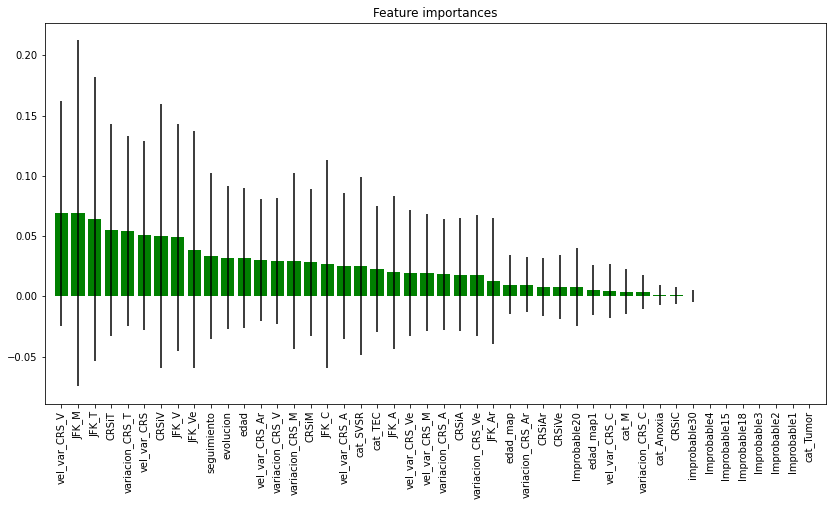

In [22]:
NF46=df[['edad', 'edad_map', 'edad_map1', 'evolucion', 'seguimiento', 'cat_SVSR',
       'cat_M', 'cat_Anoxia', 'cat_TEC', 'cat_Tumor', 'CRSiA', 'CRSiV',
       'CRSiM', 'CRSiVe', 'CRSiC', 'CRSiAr', 'CRSiT', 'JFK_A', 'JFK_V',
       'JFK_M', 'JFK_Ve', 'JFK_C', 'JFK_Ar', 'JFK_T', 'variacion_CRS_A',
       'variacion_CRS_V', 'variacion_CRS_C', 'variacion_CRS_Ar',
       'variacion_CRS_M', 'variacion_CRS_Ve', 'variacion_CRS_T',
       'vel_var_CRS_A', 'vel_var_CRS_V', 'vel_var_CRS_C', 'vel_var_CRS_Ar',
       'vel_var_CRS_M', 'vel_var_CRS_Ve', 'vel_var_CRS', 'improbable30',
       'Improbable1', 'Improbable2', 'Improbable3', 'Improbable4',
       'Improbable15', 'Improbable18', 'Improbable20']]
X=NF46
y=df[['EMERGENCIA']]

# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# NF40 n=40 
### Medical Criteria 
Exclude improbable conditions in NF46 with 0 observations

In [23]:
NF40=NF46

#Drop columns in NF46 that sum 0 (Improbable conditions without observations)
NF40.drop([col for col, val in NF40.sum().iteritems() if val < 0.1], axis=1, inplace=True)
NF40.shape

(90, 40)

In [24]:
NF40.columns

Index(['edad', 'edad_map', 'edad_map1', 'evolucion', 'seguimiento', 'cat_SVSR',
       'cat_M', 'cat_Anoxia', 'cat_TEC', 'cat_Tumor', 'CRSiA', 'CRSiV',
       'CRSiM', 'CRSiVe', 'CRSiC', 'CRSiAr', 'CRSiT', 'JFK_A', 'JFK_V',
       'JFK_M', 'JFK_Ve', 'JFK_C', 'JFK_Ar', 'JFK_T', 'variacion_CRS_A',
       'variacion_CRS_V', 'variacion_CRS_C', 'variacion_CRS_Ar',
       'variacion_CRS_M', 'variacion_CRS_Ve', 'variacion_CRS_T',
       'vel_var_CRS_A', 'vel_var_CRS_V', 'vel_var_CRS_C', 'vel_var_CRS_Ar',
       'vel_var_CRS_M', 'vel_var_CRS_Ve', 'vel_var_CRS', 'improbable30',
       'Improbable20'],
      dtype='object')

# NF39 n=39 
### Medical criteria selection 2

Elimination of all individual improbable conditions (NF39=NF40-Improbable20=NF75+RFECV)

In [25]:
NF39=df[['edad','edad_map','edad_map1', 'evolucion','seguimiento','cat_SVSR', 'cat_M', 
          'cat_Anoxia', 'cat_TEC','cat_Tumor',
          'CRSiA', 'CRSiV', 'CRSiM', 'CRSiVe', 'CRSiC', 'CRSiAr','CRSiT', 
          'JFK_A', 'JFK_V', 'JFK_M','JFK_Ve', 'JFK_C', 'JFK_Ar', 'JFK_T',
          'variacion_CRS_A', 'variacion_CRS_V', 'variacion_CRS_C','variacion_CRS_Ar', 'variacion_CRS_M', 
          'variacion_CRS_Ve','variacion_CRS_T',
          'vel_var_CRS_A', 'vel_var_CRS_V', 'vel_var_CRS_C','vel_var_CRS_Ar', 'vel_var_CRS_M','vel_var_CRS_Ve',
          'vel_var_CRS', 
          'improbable30']]
NF39.shape

(90, 39)

# NF14 n=14 
### Recursive Feature Elimination with Random Forrest and Cross Validation of NF39

In [26]:
X=NF39
y=df[['EMERGENCIA']]

In [27]:
from sklearn.model_selection import train_test_split
# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf = RandomForestClassifier(random_state=42,max_depth=5) 
rfecv = RFECV(estimator=clf_rf, step=1, cv=5,scoring='balanced_accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 14
Best features : Index(['edad', 'evolucion', 'seguimiento', 'CRSiV', 'CRSiT', 'JFK_V', 'JFK_M',
       'JFK_Ve', 'JFK_T', 'variacion_CRS_M', 'variacion_CRS_T',
       'vel_var_CRS_A', 'vel_var_CRS_V', 'vel_var_CRS'],
      dtype='object')


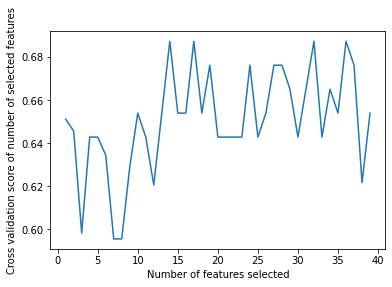

In [28]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Feature ranking:
1. feature 16 (0.079415)
2. feature 23 (0.077992)
3. feature 32 (0.075360)
4. feature 19 (0.074626)
5. feature 18 (0.060395)
6. feature 37 (0.056902)
7. feature 25 (0.047783)
8. feature 20 (0.039942)
9. feature 0 (0.038113)
10. feature 3 (0.036609)
11. feature 30 (0.034492)
12. feature 4 (0.033098)
13. feature 34 (0.027225)
14. feature 35 (0.027057)
15. feature 31 (0.026335)
16. feature 36 (0.024616)
17. feature 12 (0.022378)
18. feature 17 (0.021176)
19. feature 5 (0.020605)
20. feature 28 (0.019514)
21. feature 11 (0.019191)
22. feature 8 (0.016663)
23. feature 21 (0.015988)
24. feature 29 (0.015264)
25. feature 10 (0.013009)
26. feature 33 (0.012325)
27. feature 24 (0.009590)
28. feature 13 (0.009204)
29. feature 15 (0.008120)
30. feature 1 (0.007628)
31. feature 6 (0.005715)
32. feature 27 (0.005632)
33. feature 22 (0.004745)
34. feature 2 (0.004678)
35. feature 7 (0.003746)
36. feature 26 (0.003228)
37. feature 14 (0.001285)
38. feature 38 (0.000359)
39. feature 9

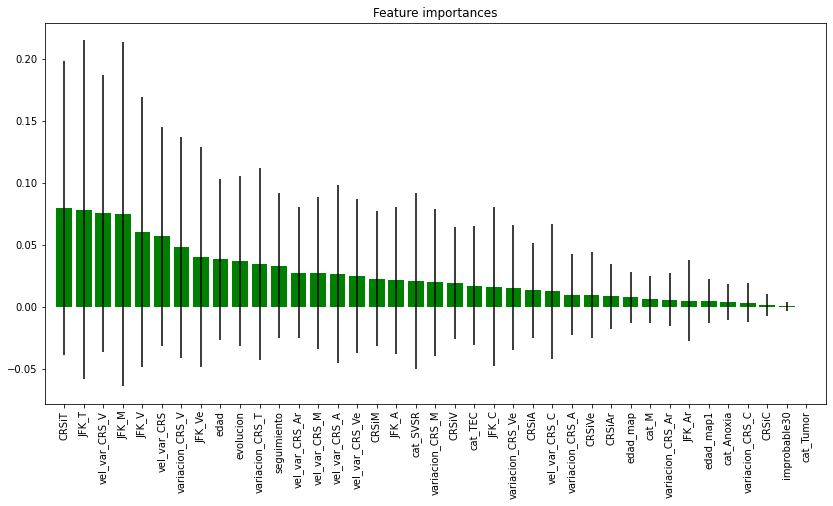

In [29]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [30]:
NF14=df[['edad', 'evolucion', 'seguimiento', 
         'CRSiV', 'CRSiT', 
         'JFK_V', 'JFK_M','JFK_Ve', 'JFK_T', 
         'variacion_CRS_M', 'variacion_CRS_T',
         'vel_var_CRS_A', 'vel_var_CRS_V', 'vel_var_CRS']]

# NF13 (n=13) 
### Exclude 'seguimiento' from NF14

In [31]:
#Select cols to drop
cols_drop=['seguimiento']
#Drop selected cols
NF13 = NF14.drop(cols_drop, 1)
NF13.columns

Index(['edad', 'evolucion', 'CRSiV', 'CRSiT', 'JFK_V', 'JFK_M', 'JFK_Ve',
       'JFK_T', 'variacion_CRS_M', 'variacion_CRS_T', 'vel_var_CRS_A',
       'vel_var_CRS_V', 'vel_var_CRS'],
      dtype='object')

# NF12 (n= 12)
### Drop strong correlated features of NF14
Criteria: 
1. Spearman Rho > 0.85
2. Less correlation with outcome 
3. Less future importance

In [32]:
#f,ax = plt.subplots(figsize=(12, 10))
#plt.title('Correlación entre variables', y=1.05, size=12)
#sns.heatmap(NF14_corr.corr(method='spearman'), annot=True, square=True,linewidths=.5, fmt='.1f',ax=ax)


#Select df to explore correlations
df_corr=NF14

#Select target column
target_col=['EMERGENCIA']
#Join to df select target colum
df_corr=df_corr.join(df[target_col])

# Select level of corr
level_corr=0.85

#Create empty list for the names of columns to drop
cols_drop=[]

# Iterate over the sequence of column names
for column in df_corr:
    #Select column contents by column name using [] operator
    spearman_corr=df_corr.corr(method='spearman')
    #Select column contents by column name using [] operator and Define the level of correlation
    spearman_corr=spearman_corr.loc[spearman_corr[column] > level_corr]
    #Select the correlation if is not only correlated with itself
    if column != (spearman_corr.index.values)[-1]:
        print()
        #Print column name it correlations
        print('Column Name : ', column)
        print('High correlation with other columns : ', spearman_corr.index.values.tolist())
        #Append column name to drop
        cols_drop.append(column)
        #Print cols to drop if array size > 1 column
        if len(cols_drop) != 1:           
            print()
            print('Columns to drop : ', cols_drop)


Column Name :  JFK_V
High correlation with other columns :  ['JFK_V', 'JFK_T']

Column Name :  variacion_CRS_T
High correlation with other columns :  ['variacion_CRS_T', 'vel_var_CRS']

Columns to drop :  ['JFK_V', 'variacion_CRS_T']


In [33]:
#Drop selected cols
NF12 = NF14.drop(cols_drop, axis=1)
NF12.shape

(90, 12)

# NF9 (n=  9)
### Drop moderate correlated features 
Criteria: 
1. Spearman Rho > 0.69
2. Less correlation with outcome 
3. Less future importance

In [34]:
#f,ax = plt.subplots(figsize=(12, 10))
#plt.title('Correlación entre variables', y=1.05, size=12)
#sns.heatmap(NF14_corr.corr(method='spearman'), annot=True, square=True,linewidths=.5, fmt='.1f',ax=ax)


#Select df to explore correlations
df_corr=NF14

#Select target column
target_col=['EMERGENCIA']
#Join to df select target colum
df_corr=df_corr.join(df[target_col])

# Select level of corr
level_corr=0.69

#Create empty list for the names of columns to drop
cols_drop=[]

# Iterate over the sequence of column names
for column in df_corr:
    #Select column contents by column name using [] operator
    spearman_corr=df_corr.corr(method='spearman')
    #Select column contents by column name using [] operator and Define the level of correlation
    spearman_corr=spearman_corr.loc[spearman_corr[column] > level_corr]
    #Select the correlation if is not only correlated with itself
    if column != (spearman_corr.index.values)[-1]:
        print()
        #Print column name with its correlations
        print('Column Name : ', column)
        print('Moderate correlation with other columns : ', spearman_corr.index.values.tolist())
        #Append column name to drop
        cols_drop.append(column)
        #Print cols to drop if array size > 1 column
        if len(cols_drop) != 1:           
            print()
            print('Columns to drop : ', cols_drop)


Column Name :  CRSiV
Moderate correlation with other columns :  ['CRSiV', 'CRSiT']

Column Name :  JFK_V
Moderate correlation with other columns :  ['JFK_V', 'JFK_T', 'vel_var_CRS_V']

Columns to drop :  ['CRSiV', 'JFK_V']

Column Name :  JFK_M
Moderate correlation with other columns :  ['JFK_M', 'JFK_T']

Columns to drop :  ['CRSiV', 'JFK_V', 'JFK_M']

Column Name :  variacion_CRS_T
Moderate correlation with other columns :  ['variacion_CRS_T', 'vel_var_CRS_V', 'vel_var_CRS']

Columns to drop :  ['CRSiV', 'JFK_V', 'JFK_M', 'variacion_CRS_T']

Column Name :  vel_var_CRS_V
Moderate correlation with other columns :  ['JFK_V', 'variacion_CRS_T', 'vel_var_CRS_V', 'vel_var_CRS']

Columns to drop :  ['CRSiV', 'JFK_V', 'JFK_M', 'variacion_CRS_T', 'vel_var_CRS_V']


In [35]:
#Drop selected cols
NF9 = NF14.drop(cols_drop, axis=1)
NF9.columns

Index(['edad', 'evolucion', 'seguimiento', 'CRSiT', 'JFK_Ve', 'JFK_T',
       'variacion_CRS_M', 'vel_var_CRS_A', 'vel_var_CRS'],
      dtype='object')

### NF9 con la cual se realizaron GS y las metricas

In [36]:
NF9_REGISTRADA=df[['edad', 'evolucion','seguimiento', 
      #'CRSiV', 
      'CRSiT', 
      #'JFK_M', 
      'JFK_Ve','JFK_T', 'variacion_CRS_M','vel_var_CRS_A','vel_var_CRS_V', 
      #'vel_var_CRS'
     ]]

# NF8 (n=  8)
### Drop moderate correlated features without 'seguimiento'
Criteria: 
1. Spearman Rho > 0.69
2. Less correlation with outcome 
3. Less future importance

In [37]:
NF8=df[['edad', 'evolucion',
      #'seguimiento', 
      #'CRSiV', 
      'CRSiT', 
      #'JFK_M', 
      'JFK_Ve','JFK_T', 'variacion_CRS_M','vel_var_CRS_A','vel_var_CRS_V', 
      #'vel_var_CRS'
     ]]

# NF5Corr (n=  5)
### Drop regular correlated features 
Criteria: 
1. Spearman Rho > 0.49
2. Less correlation with outcome 
3. Less future importance

In [39]:
NF4Corr=df[['edad', 'evolucion','seguimiento', 
         #'CRSiV', 
         #'CRSiT', 
         #'JFK_M', 
         #'JFK_Ve',
         'JFK_T', 'variacion_CRS_M',#'vel_var_CRS_A',
         #'vel_var_CRS_V', 
         #'vel_var_CRS'
       ]]

# NF16 (Ingreso)
### Only variables collected at Admission

In [40]:
NF16=df[['edad','edad_map','edad_map1',
         'evolucion',
         'cat_SVSR', 'cat_M', 'cat_Anoxia', 'cat_TEC','cat_Tumor',
         'CRSiA', 'CRSiV', 'CRSiM', 'CRSiVe', 'CRSiC', 'CRSiAr','CRSiT', 
         ]]
NF16.columns

Index(['edad', 'edad_map', 'edad_map1', 'evolucion', 'cat_SVSR', 'cat_M',
       'cat_Anoxia', 'cat_TEC', 'cat_Tumor', 'CRSiA', 'CRSiV', 'CRSiM',
       'CRSiVe', 'CRSiC', 'CRSiAr', 'CRSiT'],
      dtype='object')

# NF23 (CRS mes)
### NF 16 + best CRSs in the first month

In [41]:
NF23=df[['edad','edad_map','edad_map1',
         'evolucion',
         'cat_SVSR', 'cat_M', 'cat_Anoxia', 'cat_TEC','cat_Tumor',
         'CRSiA', 'CRSiV', 'CRSiM', 'CRSiVe', 'CRSiC', 'CRSiAr','CRSiT',
         'JFK_A', 'JFK_V', 'JFK_M','JFK_Ve', 'JFK_C', 'JFK_Ar', 'JFK_T',
         ]]
NF23.shape

(90, 23)

# NF30 (CRS mes + Var )
### NF 16 + best CRS in the first month + Variation CRS

In [42]:
NF30=df[['edad','edad_map','edad_map1',
         'evolucion',
         'cat_SVSR', 'cat_M', 'cat_Anoxia', 'cat_TEC','cat_Tumor',
         'CRSiA', 'CRSiV', 'CRSiM', 'CRSiVe', 'CRSiC', 'CRSiAr','CRSiT',
         'JFK_A', 'JFK_V', 'JFK_M','JFK_Ve', 'JFK_C', 'JFK_Ar', 'JFK_T',
         'variacion_CRS_T','variacion_CRS_A', 'variacion_CRS_V', 'variacion_CRS_C','variacion_CRS_Ar', 
         'variacion_CRS_M', 'variacion_CRS_Ve'
         ]]
NF30.shape

(90, 30)

# NF37 (CRS mes + Var + Vel_var)
### NF 16 + best CRS in the first month + Variation CRS + Tasa de variacion

In [43]:
NF37=df[['edad','edad_map','edad_map1',
         'evolucion',
         'cat_SVSR', 'cat_M', 'cat_Anoxia', 'cat_TEC','cat_Tumor',
         'CRSiA', 'CRSiV', 'CRSiM', 'CRSiVe', 'CRSiC', 'CRSiAr','CRSiT',
         'JFK_A', 'JFK_V', 'JFK_M','JFK_Ve', 'JFK_C', 'JFK_Ar', 'JFK_T',
         'variacion_CRS_T','variacion_CRS_A', 'variacion_CRS_V', 'variacion_CRS_C','variacion_CRS_Ar', 
         'variacion_CRS_M', 'variacion_CRS_Ve',
         'vel_var_CRS', 'vel_var_CRS_A', 'vel_var_CRS_V', 'vel_var_CRS_C','vel_var_CRS_Ar', 'vel_var_CRS_M', 
         'vel_var_CRS_Ve',
         ]]
NF37.shape

(90, 37)

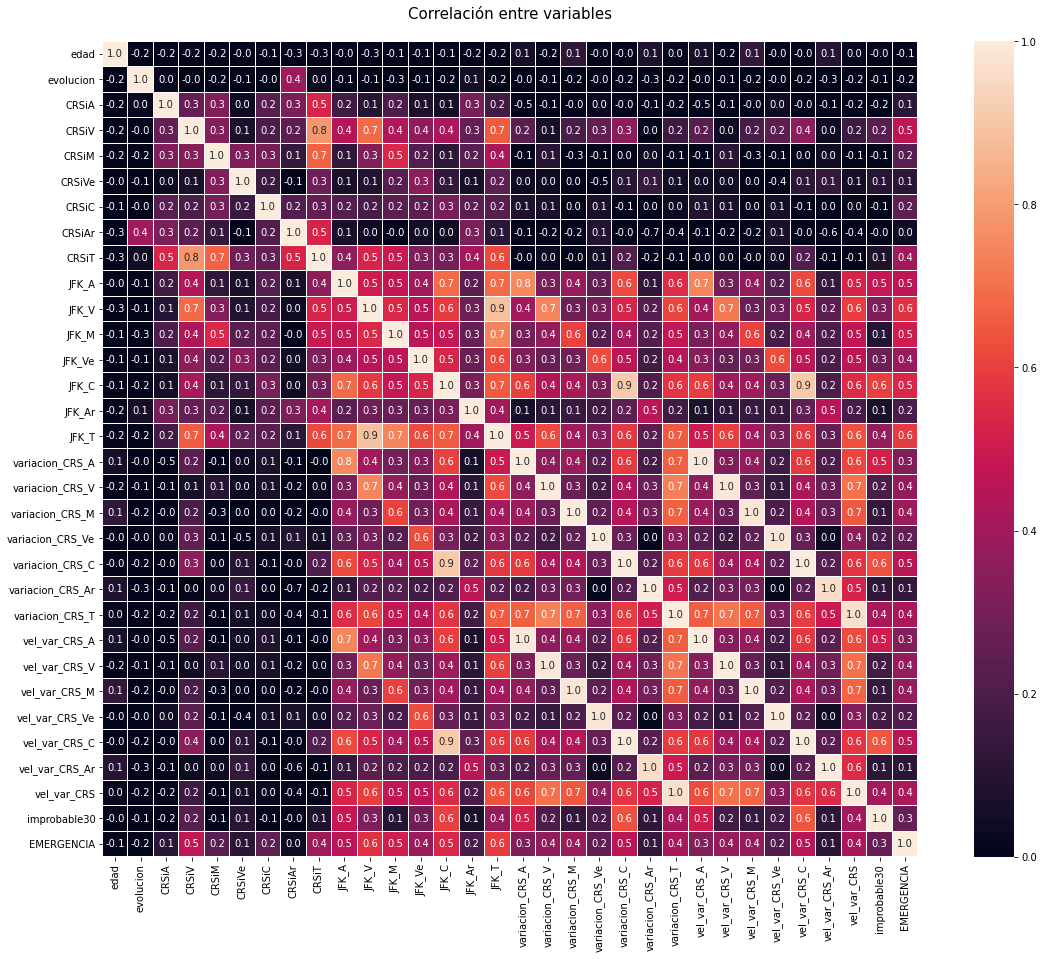

In [51]:
heatmap=df[['edad',
         'evolucion',
         'CRSiA', 'CRSiV', 'CRSiM', 'CRSiVe', 'CRSiC', 'CRSiAr','CRSiT',
         'JFK_A', 'JFK_V', 'JFK_M','JFK_Ve', 'JFK_C', 'JFK_Ar', 'JFK_T',
         'variacion_CRS_A', 'variacion_CRS_V', 'variacion_CRS_M', 'variacion_CRS_Ve','variacion_CRS_C',
         'variacion_CRS_Ar','variacion_CRS_T',
         'vel_var_CRS_A', 'vel_var_CRS_V', 'vel_var_CRS_M', 'vel_var_CRS_Ve','vel_var_CRS_C','vel_var_CRS_Ar', 
         'vel_var_CRS', 
         'improbable30','EMERGENCIA'
         ]]

f,ax = plt.subplots(figsize=(20, 15))
plt.title('Correlación entre variables', y=1.02, 
          size=15)
sns.heatmap(heatmap.corr(method='spearman'), annot=True, fmt=".1f", linewidths=0.005,square=True, vmin=0, vmax=1)

# NF1 (MA step to step)
### Multivariate analysis of NF 52

In [52]:
logit_df1=df[['edad', 'edad_map', 'edad_map1', 'evolucion', 'seguimiento', 'cat_SVSR','cat_M', 
              'cat_Anoxia', 'cat_TEC',
              'cat_Tumor',
              'EMERGENCIA']]

logit_df2=df[['cat_SVSR', #Unica variable independiente en log_df1
              'CRSiA', 'CRSiV','CRSiM', 'CRSiVe', 'CRSiC', 'CRSiAr', 'CRSiT',
              'EMERGENCIA']]

logit_df3=df[['CRSiV', #Unica variable independiente en log_df2
              'JFK_A', 'JFK_V','JFK_M', 'JFK_Ve', 'JFK_C', 'JFK_Ar', 'JFK_T',
              'EMERGENCIA']]

logit_df4=df[['JFK_T', #Unica variable independiente en log_df3
              'improbable30','Improbable19','Improbable30','Improbable34','Improbable35','Improbable36',
              'EMERGENCIA']]

logit_df5=df[['JFK_T', #Unica variable independiente en log_df4
              'Improbable20','Improbable23','Improbable26','Improbable29',
              'EMERGENCIA']]

logit_df6=df[['JFK_T', #Unica variable independiente en log_df5
              'Improbable25','Improbable31','EMERGENCIA']]

logit_df7=df[['JFK_T', #Unica variable independiente en log_df6
              #'Improbable24',
              'Improbable33', 
              'EMERGENCIA']]

logit_df8=df[['JFK_T', #Unica variable independiente en log_df7
              #'Improbable24', PENDIENTE SACAR
              'variacion_CRS_A','variacion_CRS_V', 'variacion_CRS_C', 'variacion_CRS_Ar','variacion_CRS_M', 
              'variacion_CRS_Ve', 'variacion_CRS_T',
              'EMERGENCIA']]

logit_df9=df[['JFK_T', #Unica variable independiente en log_df8
              #'Improbable24', PENDIENTE SACAR
              'vel_var_CRS_A', 'vel_var_CRS_V', 'vel_var_CRS_C', 
              'vel_var_CRS_Ar',
              'vel_var_CRS_M', 
              'vel_var_CRS_Ve', 
              #'vel_var_CRS',
             'EMERGENCIA']]

logit_df10=df[['JFK_T', #Unica variable independiente en log_df9
              #'Improbable24', PENDIENTE SACAR
              'vel_var_CRS',
             'EMERGENCIA']]

logit_df10=df[['JFK_T', #Unica variable independiente en log_df10
              'Improbable24',# PENDIENTE SACAR
              'EMERGENCIA']]

In [53]:
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
from statsmodels.tools import add_constant as add_constant

logit_df=logit_df9#.join(df.EMERGENCIA)

logit_df_constant = add_constant(logit_df)
logit_df_constant.head()

,const,JFK_T,vel_var_CRS_A,vel_var_CRS_V,vel_var_CRS_C,vel_var_CRS_Ar,vel_var_CRS_M,vel_var_CRS_Ve,EMERGENCIA
295,1.0,5,0.062500,0.000000,0.000000,0.062500,-0.062500,0.0,0
239,1.0,6,0.000000,0.000000,0.000000,0.040000,0.000000,0.0,0
190,1.0,19,0.111111,0.148148,0.037037,0.037037,0.148148,0.0,1
291,1.0,12,0.200000,0.200000,0.000000,0.100000,0.400000,0.2,0
128,1.0,11,0.033333,0.033333,0.000000,0.000000,0.066667,0.0,0


In [54]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=logit_df_constant.columns[:-1]
model=sm.Logit(logit_df.EMERGENCIA,logit_df_constant[cols])
result=model.fit(random_state=42)
result.summary()

Optimization terminated successfully.
         Current function value: 0.344677
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             EMERGENCIA   No. Observations:                   90
Model:                          Logit   Df Residuals:                       82
Method:                           MLE   Df Model:                            7
Date:                Wed, 06 May 2020   Pseudo R-squ.:                  0.3936
Time:                        11:35:27   Log-Likelihood:                -31.021
converged:                       True   LL-Null:                       -51.152
Covariance Type:            nonrobust   LLR p-value:                 1.121e-06
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -5.0398      1.101     -4.579      0.000      -7.197      -2.882
JFK_T              0.3962      0.116      3.424      0.001       0.169       0.623
vel_var_CRS_A     -6.2117      8.057     -0.771      0.441     -22.003       9.579
vel_var_CRS_V      1.1419      5.835      0.196      0.845     -10.295      12.579
vel_var_CRS_C      3.3668     18.710      0.180      0.857     -33.303      40.037
vel_var_CRS_Ar   -10.0903     10.556     -0.956      0.339     -30.779      10.598
vel_var_CRS_M      0.4060      5.804      0.070      0.944     -10.970      11.782
vel_var_CRS_Ve     0.5522      9.679      0.057      0.955     -18.419      19.523
==================================================================================
"""

In [55]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(logit_df_constant,logit_df.EMERGENCIA,cols)

In [56]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             EMERGENCIA   No. Observations:                   90
Model:                          Logit   Df Residuals:                       88
Method:                           MLE   Df Model:                            1
Date:                Wed, 06 May 2020   Pseudo R-squ.:                  0.3722
Time:                        11:35:29   Log-Likelihood:                -32.116
converged:                       True   LL-Null:                       -51.152
Covariance Type:            nonrobust   LLR p-value:                 6.816e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8212      0.897     -5.372      0.000      -6.580      -3.062
JFK_T          0.3466      0.075      4.622      0.000       0.200       0.494
==============================================================================
"""

In [57]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,6)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

       CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio    pvalue
const      0.001388       0.046781    0.008057  0.000000
JFK_T      1.220904       1.638101    1.414201  0.000004


In [58]:
NF1=df[['JFK_T']]
#NF4MA=df[['CRSiV','JFK_Ve','vel_var_CRS_V','cat_TEC']]

<div class="alert alert-info">
<h1><center><font color=darkblue> SELECT DATASET <font></center></h1>


</div>

In [59]:
X= NF37

y= df[['EMERGENCIA']]

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)

print('Tamaño del DF seleccionado')
print(df.shape)
print('Tamaño del conjunto de  X Entrenamiento')
print(X_train.shape)
print('Tamaño del conjunto de  y Entrenamiento')
print(y_train.shape)
print('Tamaño del conjunto de X Test')
print(X_test.shape)
print('Tamaño del conjunto de y Test')
print(y_test.shape)

Tamaño del DF seleccionado
(90, 98)
Tamaño del conjunto de  X Entrenamiento
(63, 37)
Tamaño del conjunto de  y Entrenamiento
(63, 1)
Tamaño del conjunto de X Test
(27, 37)
Tamaño del conjunto de y Test
(27, 1)


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=5, n_jobs=3, verbose=1, scoring='balanced_accuracy', refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring='balanced_accuracy', refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        modelss= []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

#### Dataframe of search space params to Grid search

In [62]:
data = [{'classifier': 'RandomForestClassifier',
         'criterion': ['gini', 'entropy'],
         'n_estimators': [1,2,3,4,5,10,15,20],
         'max_depth': [1,2,3,4,5, 8, 15, 20]}, 
        {'classifier':'DecisionTreeClassifier',
         'criterion': ['gini', 'entropy'],'max_depth': [1,2,3,4,5,10,15,20]},
        {'classifier':'KNeighborsClassifier',
         'n_neighbors': [2,4,8,16]},
        {'classifier':'LogisticRegression',
         'penalty': ['l2','l1'],"C": np.round(np.logspace(0, 2, 10), 2),
         "solver":['newton-cg','saga','sag','liblinear']},
        {'classifier':'GaussianNB'},
        {'classifier':'MLPClassifier',
         'hidden_layer_sizes': range(1,200,10) , 
         'activation': ['tanh','logistic','relu'],
         'alpha':[0.0001,0.001,0.01,0.1,1,10], 
         'max_iter': range(50,200,50)},
        {'classifier':'SVC',
         'kernel': ['linear','rbf'], 
         'C': [1, 10, 100, 1000], 
         'gamma': [0.0001,0.001, 0.01, 0.1,1, 10]}
       ]
# Creates DataFrame. 
grid_search_parms = pd.DataFrame(data).sort_values(by='classifier')
grid_search_parms = grid_search_parms[['classifier','criterion','max_depth','n_estimators','n_neighbors','penalty',
                                       "solver","C",'kernel','gamma','hidden_layer_sizes','activation','alpha',
                                       'max_iter']]
#grid_search_parms.to_excel('GS_search_space_parms.xlsx')
#grid_search_parms

In [ ]:
random_state=42
models1 = { 
    'RandomForestClassifier': RandomForestClassifier(random_state=random_state),
    'SVC': SVC(random_state=random_state),
    'DecisionTreeClassifier':DecisionTreeClassifier(random_state=random_state),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'LogisticRegression':LogisticRegression(random_state=random_state),
    'GaussianNB':GaussianNB(),
    'MLPClassifier':MLPClassifier(random_state=random_state)
    
                }

params1 = { 
    'RandomForestClassifier': [
        {'criterion': ['gini', 'entropy'],
         'n_estimators': [1,2,3,4,5,10,15,20],
         'max_depth': [1,2,3,4,5, 8, 15, 20]},
                                ],
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
        {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.0001,0.001, 0.01, 0.1,1, 10]}
    ],
    'DecisionTreeClassifier':[
        {'criterion': ['gini', 'entropy'],'max_depth': [1,2,3,4,5,10,15,20]}
    ],
    'KNeighborsClassifier':[
        {'n_neighbors': [2,4,8,16]}
    ],
    'LogisticRegression':[
        {'penalty': ['l2','l1'],"C": np.logspace(0, 2, 10)},
        {'penalty': ['l2'],"C": np.logspace(0, 2, 10),"solver":['newton-cg','saga','sag','liblinear']} ##This solvers don't allow L1 penalty
    ],
    'GaussianNB':[{}
    ],
    'MLPClassifier': [
                       {'hidden_layer_sizes': range(1,200,10) , 
                        'activation': ['tanh','logistic','relu'],
                        'alpha':[0.0001,0.001,0.01,0.1,1,10], 
                        'max_iter': range(50,200,50)
                        }
    ]
}


#Run GRidsearch
helper1 = EstimatorSelectionHelper(models1, params1)
helper1.fit(X_train, y_train, scoring=('balanced_accuracy'), n_jobs=1)

#Create report
helper_report=helper1.score_summary(sort_by='max_score')
helper_report

Running GridSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed:   15.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Running GridSearchCV for SVC.
Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    8.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Running GridSearchCV for DecisionTreeClassifier.
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Running GridSearchCV for KNeighborsClassifier.
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Running GridSearchCV for LogisticRegression.
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Running GridSearchCV for GaussianNB.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Running GridSearchCV for MLPClassifier.
Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


In [ ]:
print('Number of models GS',len(helper_report))
# Sort report by Max Score, Mean Score an Min Score
helper_report_resorted=helper_report.sort_values(by=['max_score','mean_score','min_score'],ascending=False)
helper_report_resorted.loc[helper_report_resorted.estimator=='MLPClassifier']

In [ ]:
#Get only best GS socored candidate for each model
best_helpers_report=helper_report_resorted.drop_duplicates(subset='estimator', keep='first')
#Order columns
best_helpers_report=best_helpers_report[['estimator', 'C', 'criterion', 'gamma', 'kernel', 'max_depth','n_estimators',
                                            'n_neighbors', 'penalty', 'solver', 'activation', 'alpha',
                                            'hidden_layer_sizes','max_iter','min_score','mean_score','max_score',
                                            'std_score']]
#Sort by estimator
best_helpers_report=best_helpers_report.sort_values(by=['estimator'])
#Rename cols
best_helpers_report=best_helpers_report.rename(columns={'estimator':'classifiers'})
best_helpers_report

<div class="alert alert-info">
<h1><center><font color=darkblue> SAVE HELPERS REPORT IN CLASSIFIERS <font></center></h1>


</div>

In [ ]:
X_train.shape

In [ ]:
stop

### Must review saved classifiers saved below

In [ ]:
stop
#best_helpers_report['FE']='NF30'
#best_helpers_report.to_excel('NF30_GS2.xlsx')
best_helpers_report

In [ ]:
####################################################################################################################
#  NF
#####################################################################################################################
NF = 
[DecisionTreeClassifier(criterion='gini',
                               max_depth=2,
                               random_state=42)
        ,
        KNeighborsClassifier(n_neighbors=4,
                             weights='uniform', algorithm='auto', leaf_size=30, p=2,metric='minkowski', 
                             metric_params=None, n_jobs=2)
        ,
        LogisticRegression(C= 35.9381,
                           penalty= 'l2',
                           solver='newton-cg',
                           random_state=42, n_jobs=2)
        ,
        MLPClassifier(activation= 'relu',
                      alpha=0.01, 
                      hidden_layer_sizes=11, 
                      max_iter=150)
                        ,
        RandomForestClassifier(criterion='gini',
                               max_depth=2,
                               n_estimators=10,
                               random_state=42,  n_jobs = 2)
        ,
        SVC(C=1000,
            kernel='linear',
            random_state=42, probability=True)
        ,
        GaussianNB()]

# Best 6 models params

In [ ]:
#NF 1        
#KNeighborsClassifier(n_neighbors=8,weights='uniform', algorithm='auto', leaf_size=30, p=2,metric='minkowski',
 #                    metric_params=None, n_jobs=2),
#LogisticRegression(C= 100,penalty= 'l2',solver='sag', random_state=42),
#SVC(C=1000,kernel='linear',random_state=42, probability=True, random_state=42)

# All models

In [ ]:
stop

In [ ]:
#readGS=pd.read_excel('NF1_MA_NF52_GS2.xlsx')
#readGS

In [ ]:
####################################################################################################################
#  NF75
#####################################################################################################################
NF75 = [DecisionTreeClassifier(criterion='gini',
                               max_depth=3,
                               random_state=42)
        ,
        KNeighborsClassifier(n_neighbors=4,
                             weights='uniform', algorithm='auto', leaf_size=30, p=2,metric='minkowski', 
                             metric_params=None, n_jobs=2)
        ,
        LogisticRegression(C= 100,
                           penalty= 'l2',
                           solver='newton-cg',
                           random_state=42, n_jobs=2)
        ,
        MLPClassifier(activation= 'relu',
                      alpha=10, 
                      hidden_layer_sizes=91, 
                      max_iter=150)
                        ,
        RandomForestClassifier(criterion='entropy',
                               max_depth=4,
                               n_estimators=3,
                               random_state=42,  n_jobs = 2)
        ,
        SVC(C=100,
            kernel='linear',
            random_state=42, probability=True)
        ,
        GaussianNB()]

####################################################################################################################
#  NF46
#####################################################################################################################
NF46 = [DecisionTreeClassifier(criterion='gini',
                               max_depth=3,
                               random_state=42)
        ,
        KNeighborsClassifier(n_neighbors=4,
                             weights='uniform', algorithm='auto', leaf_size=30, p=2,metric='minkowski', 
                             metric_params=None, n_jobs=2)
        ,
        LogisticRegression(C= 100,
                           penalty= 'l2',
                           solver='sag',
                           random_state=42, n_jobs=2)
        ,
        MLPClassifier(activation= 'relu',
                      alpha=10, 
                      hidden_layer_sizes=91, 
                      max_iter=50)
                        ,
        RandomForestClassifier(criterion='gini',
                               max_depth=2,
                               n_estimators=15,
                               random_state=42,  n_jobs = 2)
        ,
        SVC(C=100,
            kernel='linear',
            random_state=42, probability=True)
        ,
        GaussianNB()]

####################################################################################################################
#  NF40
#####################################################################################################################
NF40 = [DecisionTreeClassifier(criterion='gini',
                               max_depth=20,
                               random_state=42)
        ,
        KNeighborsClassifier(n_neighbors=4,
                             weights='uniform', algorithm='auto', leaf_size=30, p=2,metric='minkowski', 
                             metric_params=None, n_jobs=2)
        ,
        LogisticRegression(C= 1,
                           penalty= 'l2',
                           solver='sag',
                           random_state=42, n_jobs=2)
        ,
        MLPClassifier(activation= 'relu',
                      alpha=0.1, 
                      hidden_layer_sizes=81, 
                      max_iter=50)
                        ,
        RandomForestClassifier(criterion='entropy',
                               max_depth=1,
                               n_estimators=5,
                               random_state=42,  n_jobs = 2)
        ,
        SVC(C=1000,
            kernel='linear',
            random_state=42, probability=True)
        ,
        GaussianNB()]

####################################################################################################################
#  NF39
#####################################################################################################################
NF39 = [DecisionTreeClassifier(criterion='gini',
                               max_depth=3,
                               random_state=42)
        ,
        KNeighborsClassifier(n_neighbors=4,
                             weights='uniform', algorithm='auto', leaf_size=30, p=2,metric='minkowski', 
                             metric_params=None, n_jobs=2)
        ,
        LogisticRegression(C= 59.9484,
                           penalty= 'l2',
                           solver='sag',
                           random_state=42, n_jobs=2)
        ,
        MLPClassifier(activation= 'relu',
                      alpha=10, 
                      hidden_layer_sizes=71, 
                      max_iter=50)
                        ,
        RandomForestClassifier(criterion='gini',
                               max_depth=1,
                               n_estimators=10,
                               random_state=42,  n_jobs = 2)
        ,
        SVC(C=1000,
            kernel='linear',
            random_state=42, probability=True)
        ,
        GaussianNB()]

####################################################################################################################
#  NF30
#####################################################################################################################
NF30 = [DecisionTreeClassifier(criterion='gini',
                               max_depth=2,
                               random_state=42)
        ,
        KNeighborsClassifier(n_neighbors=4,
                             weights='uniform', algorithm='auto', leaf_size=30, p=2,metric='minkowski', 
                             metric_params=None, n_jobs=2)
        ,
        LogisticRegression(C= 35.9381,
                           penalty= 'l2',
                           solver='newton-cg',
                           random_state=42, n_jobs=2)
        ,
        MLPClassifier(activation= 'relu',
                      alpha=0.01, 
                      hidden_layer_sizes=11, 
                      max_iter=150)
                        ,
        RandomForestClassifier(criterion='gini',
                               max_depth=2,
                               n_estimators=10,
                               random_state=42,  n_jobs = 2)
        ,
        SVC(C=1000,
            kernel='linear',
            random_state=42, probability=True)
        ,
        GaussianNB()]

####################################################################################################################
#  NF1_MA_NF52
#####################################################################################################################
NF1_MA_NF52 = [DecisionTreeClassifier(criterion='entropy',
                               max_depth=1,
                               random_state=42)
        ,
        KNeighborsClassifier(n_neighbors=8,
                             weights='uniform', algorithm='auto', leaf_size=30, p=2,metric='minkowski', 
                             metric_params=None, n_jobs=2)
        ,
        LogisticRegression(C= 100,
                           penalty= 'l2',
                           solver='sag',
                           random_state=42, n_jobs=2)
        ,
        MLPClassifier(activation= 'tanh',
                      alpha=0.01, 
                      hidden_layer_sizes=51, 
                      max_iter=150)
                        ,
        RandomForestClassifier(criterion='entropy',
                               max_depth=4,
                               n_estimators=2,
                               random_state=42,  n_jobs = 2)
        ,
        SVC(C=1000,
            kernel='linear',
            random_state=42, probability=True)
        ,
        GaussianNB()]

In [ ]:
#print('[')
#for i in range(len(loop)) :
 #   print('(') 
  #  for item, frame in loop.iloc[i].iteritems():   
   #     if pd.notnull(frame):
   #         print (item,':',frame,',')
  #  print('random_state=42',')')
#print(']')

<div class="alert alert-info">
<h1><center><font color=darkblue> SELECT CLASSIFIERS LIST <font></center></h1>


</div>

In [ ]:
X_train.shape

In [ ]:
classifiers = NF37

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)

In [ ]:
#Training multiple classifiers and recording the results
### https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot
from sklearn.metrics import roc_curve, roc_auc_score



#classifiers = train_all_helpers(helpers_to_train)




model_dict = {}

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for n,cls in enumerate(classifiers):
       
    model = cls.fit(X_train, y_train)
    
    
    
    
    model_dict[f"{cls.__class__.__name__}_{n}"]=[model,X_train.dtypes.to_dict()]
    yproba = model.predict_proba(X_test)[::,1]
    # column 0: predicted probability that each observation is a member of class 0
    # column 1: predicted probability that each observation is a member of class 1
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':np.around(fpr, decimals=2), 
                                        'tpr':np.around(tpr, decimals=2), 
                                        'auc':np.around(auc, decimals=2), 
                                       }, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
result_table

In [ ]:
fig = plt.figure(figsize=(12,8))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate (1-specificity)", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate (sensitivity)", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [ ]:
from sklearn.metrics import balanced_accuracy_score

# Define a result table as a DataFrame
conf_metrics = pd.DataFrame(columns=['FE',
                                     'classifiers',
                                     'Balanced Accuracy',
                                     'Accuracy',
                                     'AUC',
                                     'Sensitivity',
                                     'Specificity',
                                     'Precision',
                                     'PPV',
                                     'NPV',
                                     'Positive Likelihood Ratio',
                                     'Negative likelihood Ratio',
                                     'f_1 Score',
                                     'Miss-Classification',
                                     'TP',
                                     'TN',
                                     'FP',
                                     'FN',
                                     'Model Params'])

# Train the models and record the results
for cls in classifiers:
    
    # Selec model
    model = cls.fit(X_train, y_train)
    model_params=model
   # print(model)
    
    # Predict binary clasification with one of the models
    y_pred= model.predict(X_test)

    # Create confusion matrix
    from sklearn.metrics import confusion_matrix
    conf_matrix=confusion_matrix(y_test, y_pred)

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
#    print('True Positives:', TP)
#    print('True Negatives:', TN)
#    print('False Positives:', FP)
#    print('False Negatives:', FN)

    # calculate balanced accuracy
    balanced_accuracy=balanced_accuracy_score(y_test, y_pred)
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    # calculate the sensitivity
    conf_sensitivity = (float (TP) / float(TP + FN))
    # calculate the specificity
    conf_specificity = (float (TN) / float(TN + FP))
    # calculate precision
    conf_precision = (float (TN) / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    
    # calculate Positive Predictive Value
    PPV = (float(TP) / float(TP+FP))
    # calculate Negative Predictive Value
    NPV = (float(TN) / float(TN+FN))
    
#LIKELIHOODS RATIOS    
    # calculate Positve Likelihood Ratio
#    positiveLR = conf_sensitivity/(1-conf_specificity)
    # calculate Negative Likelihood Ratio
    negativeLR = (1-conf_sensitivity)/conf_specificity
    
#    print('-'*50)
#    print(f'Accuracy: {round(conf_accuracy,2)}') 
#    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
#    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
#    print(f'Specificity: {round(conf_specificity,2)}') 
#    print(f'Precision: {round(conf_precision,2)}')
#    print(f'f_1 Score: {round(conf_f1,2)}')
#    print(f'Positive Predictive Value: {round(PPV,2)}')
#    print(f'Negative Predictive Value: {round(NPV,2)}')
#    print(f'Positive Likelihood Ratio: {round(positiveLR,2)}')
#    print(f'Negative likelihood Ratio: {round(negativeLR,2)}')
#    print()
#    print()

    
    # AUC
    yproba = model.predict_proba(X_test)[::,1]
    # column 0: predicted probability that each observation is a member of class 0
    # column 1: predicted probability that each observation is a member of class 1
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
#    print('AUC',auc)
    
#    print('-'*115)
#    print()
#    print()


    
    

    conf_metrics = conf_metrics.append({'FE':best_helpers_report.FE.iloc[0],
                                        'classifiers':cls.__class__.__name__,
                                        'Balanced Accuracy': round(balanced_accuracy,2),
                                        'Accuracy': round(conf_accuracy,2),
                                        'AUC': round(auc,2), 
                                        'Sensitivity': round(conf_sensitivity,2),
                                        'Specificity': round(conf_specificity,2),
                                        'PPV': round(PPV,2),
                                        'NPV': round(NPV,2),
                                 #       'Positive Likelihood Ratio': round(positiveLR,2),
                                        'Negative likelihood Ratio': round(negativeLR,2),
                                        'Precision': round(conf_precision,2),
                                        'f_1 Score': round(conf_f1,2),
                                        'Miss-Classification': round(conf_misclassification,2),
                                        'TP': TP,
                                        'TN': TN,
                                        'FP': FP,
                                        'FN': FN,
                                        'Model Params':model_params,
                                       }, ignore_index=True)
    
# Transpose index and columns
#conf_metrics=conf_metrics.T
conf_metrics

In [ ]:
stop
metrics_GS=pd.merge(conf_metrics, best_helpers_report, how='outer', on=['classifiers'])
#metrics_GS.to_excel('NF30_metrics_GS2.xlsx')
metrics_GS.columns

# All reports

In [ ]:
NF75= pd.read_excel('NF75_metrics_GS2.xlsx')
NF52= pd.read_excel('NF52_metrics_GS2.xlsx')
NF46= pd.read_excel('NF46_metrics_GS2.xlsx')
NF40= pd.read_excel('NF40_metrics_GS2.xlsx')
NF39= pd.read_excel('NF39_metrics_GS2.xlsx')
NF37= pd.read_excel('NF37_metrics_GS2.xlsx')
NF30= pd.read_excel('NF30_metrics_GS2.xlsx')
NF23= pd.read_excel('NF23_metrics_GS2.xlsx')
NF16= pd.read_excel('NF16_metrics_GS2.xlsx')
NF14= pd.read_excel('NF14_metrics_GS2.xlsx')
NF12= pd.read_excel('NF12_metrics_GS2.xlsx')
NF9= pd.read_excel('NF9_metrics_GS2.xlsx')
NF1_MA_NF52= pd.read_excel('NF1_MA_NF52_metrics_GS2.xlsx')
#NF8=  pd.read_excel('NF8_metrics_GS.xlsx')
#NF4Corr= pd.read_excel('NF4Corr_metrics_GS.xlsx') #Las metrcias son identicas y en algunos casos peores que NF4MA
#NF4MA= pd.read_excel('NF4MA_metrics_GS.xlsx')

report=pd.concat([NF75,NF52,NF46,NF40,NF39,NF37,NF30,NF23,NF16,NF14,NF12,NF9,NF1_MA_NF52])

#Complete NaNs in GNV of FE_y column
report['FE_y']=report['FE_x']

#Dict to rename cols
dict_cols= {'FE_y':'FE','FE_x':'NF'}
#Rename cols
report=report.rename(columns=dict_cols)

#Map number of features by FE
report['NF']=report['NF'].map({'NF75':75, 'NF52':52, 'NF46':46,'NF40':40,'NF39':39, 'NF37':37,'NF30':30,'NF23':23,
                               'NF16':16,'NF14':14,'NF13':13, 'NF12':12,'NF11':11, 'NF9':9,'NF8':8,'NF4Corr':4,
                               'NF4MA':4, 'NF1_MA_NF52':1})

#Otras metricas (SIN BALANCED ACCURACY en el test)
 #df0= pd.read_excel('option0.xlsx')
 #df1= pd.read_excel('option1.xlsx')
 #df2= pd.read_excel('option2.xlsx')
 #df3= pd.read_excel('option3.xlsx')
 #df4= pd.read_excel('option4.xlsx')
 #df5= pd.read_excel('option5.xlsx')


complete_report=report

In [ ]:
#complete_report.classifiers.unique()
#complete_report.loc[complete_report.classifiers== 'DecisionTreeClassifier'].describe()

In [ ]:
complete_report.max_score.describe()

In [ ]:
complete_report.columns

#  La exactitud es aún mayor al utilizar como variables las mejores puntuaciones de la ERC-R durante el primer mes, sus respectivas mejorías (variación respecto de las ERC-R al ingreso) y la relación entre esta mejoría y el momento en el cual es observada (tasa de variación).

## Chi cyuadrado comparando 1 variable con el resto??

In [ ]:
complete_report_copy=complete_report[['NF', 'classifiers', 'min_score', 'mean_score',
       'max_score', 'std_score','Balanced Accuracy', 'AUC', 'Sensitivity', 'Specificity']]
#complete_report_copy['NF']=complete_report_copy['NF'].map({'NF75':75,
complete_report_copy.NF.unique()

In [ ]:
complete_report_copy.NF.unique()

In [ ]:
from scipy.stats import shapiro
#Columnas a testear
shapiro_cols=complete_report_copy.select_dtypes(exclude=['datetime','object'])

# Create empty dataframes 
df_nonormal=pd.DataFrame()
df_normal = pd.DataFrame()

# Iterate over the sequence of column names
for column in shapiro_cols:
   
    # Select column contents by column name using [] operator
    columnSeries = shapiro_cols[column]
    print('Column Name : ', column)
    stat, p = shapiro(columnSeries)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
            #Create dataframes with variables with normal distributions
            df_normal[column]=columnSeries
            print('Sample looks Gaussian (fail to reject H0)')
    else:
            #Create dataframes with variables without normal distributions
            df_nonormal[column]=columnSeries
            print('Sample does not look Gaussian (reject H0)')
    print()

In [ ]:
complete_report_copy.loc[(complete_report_copy.NF != 1),'NF']=0
complete_report_copy

In [ ]:
df_nonormal.loc[complete_report_copy.NF != 1].drop(['NF'],axis=1)

In [ ]:
#df_nonormal.loc[(df_nonormal.NF != 1),'NF']=0

#Copia del DF
mw = df_nonormal#.loc[(df_nonormal.NF != 1),'NF']=0

#Groups independet to compare
df_group1= df_nonormal.loc[complete_report_copy.NF != 1]#.drop(['NF'],axis=1)
df_group2= df_nonormal.loc[complete_report_copy.NF == 1]#.drop(['NF'],axis=1)


appended_data = []

#Iteración en columnas
for column in mw:
    # Importar test
    from scipy.stats import mannwhitneyu
    
    # Muestras independientes a comparar
    data1 = df_group1[column]
    data2 = df_group2[column]
    
    # Titulo variable
    print('Test  Mann-Whitney variable: ', column)  
    # Comparar muestras
    stat, p = mannwhitneyu(data1, data2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    # Interpretar
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')
    print()

In [ ]:
complete_report_copy.loc[(df_nonormal.NF != 1),'NF']=0
complete_report_copy

In [ ]:
from tableone import TableOne
#https://github.com/tompollard/tableone/blob/master/tableone.ipynb

data=complete_report_copy#.loc[(df_nonormal.NF != 1),'NF']=0

# columns to summarize
columns = ['NF', 'classifiers', 'min_score', 'mean_score', 'max_score', 'std_score', 'Balanced Accuracy', 'AUC', 
           'Sensitivity','Specificity']

# columns containing categorical variables
categorical = ['NF', 'classifiers']

# non-normal variables
nonnormal = ['min_score', 'mean_score', 'max_score', 'std_score', 'AUC','Sensitivity', 'Specificity']

# limit the binary variable "death" to a single row
#limit = {"EMERGENCIA": 1}

# set the order of the categorical variables
#order = {"ICU": ["MICU", "SICU", "CSRU", "CCU"],
 #        "death": ["1"]}

# alternative labels
labels={#'genero':'Género', 
        #'EMERGENCIA': 'Recuperacion de la conciencia'
        }

# set decimal places for age to 0
decimals = {'min_score':2, 'mean_score':2, 'max_score':2, 'std_score':2, 'Balanced Accuracy':2, 'AUC':2, 
           'Sensitivity':2,'Specificity':2}

# optionally, a categorical variable for stratification
groupby = ['NF']

# create tableone with the input arguments
tabla_totales = TableOne(data, columns=columns, categorical=categorical, 
                   nonnormal=nonnormal, rename=labels, label_suffix=True, 
                   decimals=decimals, #limit=limit
                        )#, order=order)

tabla_totales

In [ ]:
# create grouped_table with p values
grouped_table = TableOne(data, columns, categorical, groupby, 
                         nonnormal, labels=labels, decimals=decimals, label_suffix=True, pval = True)
#grouped_table.to_excel('tabla1_grupos.xlsx')
grouped_table

In [ ]:
#f,ax = plt.subplots(figsize=(7, 6))
#plt.title('Sensibilidad en funcion de cantidad de variables', y=1.05, size=15)
#cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

#ax = sns.scatterplot(x="NF", y="Balanced Accuracy",
 #                    size="Sensitivity", sizes=(0.5, 300), 
  #                   hue="classifiers", hue_norm=(0.0, 5),
   #                  legend="full", data=complete_report)
#ax.legend(loc='center right', bbox_to_anchor=(2, 0.5), ncol=1)

In [ ]:
# Grouped boxplot
#ax = sns.boxplot(x="NF", y="max_score", hue="classifiers", data=complete_report, palette="Set1")
#sns.plt.show()
#ax.legend(loc='center right', bbox_to_anchor=(2, 0.5), ncol=1)

In [ ]:
#plots=pd.DataFrame({'x': range(1,101), 'y': np.random.randn(100)*15+range(1,101), 
 #                'z': (np.random.randn(100)*15+range(1,101))*2 })


In [ ]:
# plot
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( complete_report["max_score"] , color="skyblue", ax=axes[0, 0])
sns.distplot( complete_report["mean_score"] , color="olive", ax=axes[0, 1])
sns.distplot( complete_report["min_score"] , color="gold", ax=axes[1, 0])
sns.distplot( complete_report["std_score"] , color="teal", ax=axes[1, 1])

In [ ]:
complete_report.shape

In [ ]:
g = sns.FacetGrid(complete_report, col="classifiers", hue="classifiers", col_wrap=4, height=4, aspect=1,
                   ylim=(0, 1.1), margin_titles=True)
g.map(sns.pointplot, "NF", "max_score", order=[1, 9, 12, 14, 16, 23, 30, 37, 39, 40, 46, 52, 75], ci=None)

## Params and Metrics in training set

In [ ]:
report_best6_train=complete_report[['classifiers', 'NF', 'max_score','mean_score','min_score','std_score',
                 'C','criterion', 'gamma', 'kernel', 'max_depth', 'n_estimators','n_neighbors', 
                 'penalty', 'solver', 'activation', 'alpha','hidden_layer_sizes', 'max_iter',
                 #'Balanced Accuracy','Sensitivity','Specificity','AUC'
                                   ]
               ].sort_values(by=[
                                #'Balanced Accuracy','Sensitivity','Specificity','AUC'],
                                'max_score','mean_score','min_score'],
                             ascending=False)
report_best6_train=report_best6_train.drop_duplicates(subset=['classifiers'], keep='first', inplace=False)
#report_best6_train=report_best6_train.sort_values(by=[
 #                                             'Balanced Accuracy','Sensitivity','Specificity','AUC'],
                                              #'max_score','mean_score','min_score'],
  #                                            ascending=False)
report_best6_train#.drop(['Balanced Accuracy','Sensitivity','Specificity','AUC'],axis=1)

In [ ]:
for i in range(len(report_best6_train)) :
    for item, frame in report_best6_train.iloc[i].iteritems():   
        if pd.notnull(frame):
            print (item,':',frame,',')
    print()
print(']')

## Best 6 Test Performance 

In [ ]:
#https://www.ritchieng.com/machine-learning-evaluate-classification-model/
report_test=report.sort_values(by=['Balanced Accuracy','Sensitivity','Specificity','AUC'],ascending=False)
report_best6_test=report_test.drop_duplicates(subset=['classifiers'], keep='first', inplace=False).round(2)

### Params Best 6 Test

In [ ]:
report_best6_test[['classifiers','C','criterion', 'gamma', 'kernel', 'max_depth', 'n_estimators','n_neighbors', 'penalty', 'solver',
                   'activation', 'alpha','hidden_layer_sizes', 'max_iter',]]

### Metrics Best 6 Test

In [ ]:
report_best6_test[['NF','classifiers', 'max_score','mean_score','min_score','Balanced Accuracy', 'AUC','Sensitivity',
                    'Specificity', 'f_1 Score','TP', 'TN', 'FP', 'FN']]#.to_excel('best6_metrics.xlsx')

# Graficos

In [ ]:
labels={'JFK_A':'CRS-R A', 'JFK_V':'CRS-R V','JFK_M':'CRS-R M', 'JFK_Ve':'CRS-R Ve', 'JFK_C':'CRS-R C', 
        'JFK_Ar':'CRS-R Ar', 'JFK_T':'CRS-R T'}
df.boxplot(column = ['JFK_A', 'JFK_V','JFK_M', 'JFK_Ve', 'JFK_C', 'JFK_Ar', 'JFK_T'],labels=labels)
plt.show()
print()

In [ ]:
data_a =list(df.CRSiA), list(df.CRSiV),list(df.CRSiM),list(df.CRSiVe),list(df.CRSiC),list(df.CRSiAr),list(df.CRSiT)
data_b =list(df.JFK_A), list(df.JFK_V),list(df.JFK_M),list(df.JFK_Ve),list(df.JFK_C),list(df.JFK_Ar),list(df.JFK_T)


ticks = ['Auditory', 'Visual', 'Motor', 'Oromotor/Verbal', 'Communication', 'Arousal',
        'Total',
        ]

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure(1, figsize=(10, 5))

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='CRS at admission')
plt.plot([], c='#2C7BB6', label='Best CRS in first month')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-1, len(ticks)*2)
plt.ylim(-0.5, 22)
plt.tight_layout()
plt.savefig('boxcompare.png')

# PENDIENTES

### Comparison between types of future selection

### Change threshold

# NUEVOS PACIENTES PARA DEPLOTY

In [ ]:
STOP
num=int(input("Enter number of players: "))
tmplist=[]
for _ in range(num):
    pl=input("Enter name: " )
    tmplist.append(pl)

    print(tmplist)

# Graphs

## Decission tree

In [ ]:
NF75

In [ ]:
X=NF75
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

dectree_grid=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)

column_names=X.columns
dot_data = StringIO()  
export_graphviz(dectree_grid, out_file=dot_data,  
                feature_names=column_names,  class_names = (["EMERGENCIA" if int(i) is 1 else "NO EMERGENCIA" for i in y.unique()]),
                filled=True, rounded=True,
                proportion=True,
                special_characters=True)  
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

## alternative tree
#import graphviz
#from sklearn import tree
#dot_data = tree.export_graphviz(decision_tree=dectree_grid, out_file=None, feature_names=column_names, )
#graph = graphviz.Source(dot_data)
#graph.render("house")
#graph

# Previous reports

In [ ]:
NF75= pd.read_excel('GS1/NF75_metrics_GS.xlsx')
NF52= pd.read_excel('GS1/NF52_metrics_GS.xlsx')
NF46= pd.read_excel('GS1/NF46_metrics_GS.xlsx')
NF39= pd.read_excel('GS1/NF39_metrics_GS.xlsx')
NF14= pd.read_excel('GS1/NF14_metrics_GS.xlsx')
NF13= pd.read_excel('GS1/NF13_metrics_GS.xlsx')
NF11= pd.read_excel('GS1/NF11_metrics_GS.xlsx')
NF8=  pd.read_excel('GS1/NF8_metrics_GS.xlsx')
#NF4Corr= pd.read_excel('NF4Corr_metrics_GS.xlsx') #Las metrcias son identicas y en algunos casos peores que NF4MA
NF4MA= pd.read_excel('GS1/NF4MA_metrics_GS.xlsx')

#report=pd.concat([NF75,NF52,NF46,NF39,NF14,NF13,NF11,NF8,NF4MA,
                  #NF4Corr,
 #                 ])

# Complete NaNs in GNV of FE_y column
#report['FE_y']=report['FE_x']

# Dict to rename cols
#dict_cols= {'FE_y':'FE','FE_x':'NF'}
# Rename cols
#report=report.rename(columns=dict_cols)

#Map number of features by FE
# report['NF']=report['NF'].map({'NF75':75, 'NF52':52, 'NF46':46,'NF39':39, 'NF14':14, 'NF13':13, 'NF11':11, 'NF8':8, 
 #                                'NF4Corr':4,'NF4MA':4})

#Otras metricas previa (SIN BALANCED ACCURACY en el test)
 #df0= pd.read_excel('option0.xlsx')
 #df1= pd.read_excel('option1.xlsx')
 #df2= pd.read_excel('option2.xlsx')
 #df3= pd.read_excel('option3.xlsx')
 #df4= pd.read_excel('option4.xlsx')
 #df5= pd.read_excel('option5.xlsx')

#https://www.ritchieng.com/machine-learning-evaluate-classification-model/
#report=report[['NF','classifiers', 'Balanced Accuracy', 'AUC','Sensitivity', 'Specificity', 'f_1 Score',
 #              'Miss-Classification', 'TP', 'TN', 'FP', 'FN']].sort_values(by=['Balanced Accuracy',
  #                                                                              'Sensitivity','Specificity','AUC'
   #                                                                             ],ascending=False)
#report_best6=report.drop_duplicates(subset=['classifiers'], keep='first', inplace=False)
#report_best6

# data-to-viz.com

# Best models

In [ ]:
report_best6

In [ ]:
best_classifiers6=[GaussianNB(), #NF46
                  LogisticRegression(C= 1.6681,penalty= 'l2',random_state=42, n_jobs=2), #NF39
                  SVC(C=1000,kernel='linear',random_state=42, probability=True), #NF4MA
                  DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42), 
                  RandomForestClassifier(criterion='entropy',max_depth=2,n_estimators=15,random_state=42,n_jobs = 2),
                  KNeighborsClassifier(n_neighbors=4,weights='uniform', algorithm='auto', leaf_size=30, p=2,
                                       metric='minkowski', metric_params=None, n_jobs=2)]   

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)

In [ ]:
y_prob = mlp.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
mlp.score(X_test, y_pred)

In [ ]:
from sklearn import metrics

confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

In [ ]:
from sklearn.metrics import classification_report
auc_roc=classification_report(y_test,y_pred)
auc_roc

In [ ]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

tuned_parameters={'hidden_layer_sizes': range(1,200,10) , 'activation': ['tanh','logistic','relu'],
                  'alpha':[0.0001,0.001,0.01,0.1,1,10], 'max_iter': range(50,200,50)
    
}

In [ ]:
random_state=42
models1 = { 
    'MLPClassifier': MLPClassifier(random_state=random_state),
                }

params1 = { 
    'MLPClassifier': [
                        {'hidden_layer_sizes': range(1,200,10) , 
                         'activation': ['tanh'],
                         'activation': ['logistic'],
                         'activation': ['relu'],
                         'alpha':[0.0001,0.001,0.01,0.1,1,10], 
                         'max_iter': range(50,200,50)
                        },
    ]
}


#Run GRidsearch
helper1 = EstimatorSelectionHelper(models1, params1)
helper1.fit(X_train, y_train, scoring=('balanced_accuracy'), n_jobs=1)

In [ ]:
#Create report
helper_report=helper1.score_summary(sort_by=['max_score','mean_score'])
helper_report

In [ ]:
#Get best socred models
best_helpers_report=helper_report.loc[helper_report.max_score==1]
#Order columns
best_helpers_report=best_helpers_report[['estimator', 'C', 'criterion', 'gamma', 'kernel', 'max_depth','n_estimators',
                                            'n_neighbors', 'penalty', 'solver', 'min_score','mean_score', 
                                         'max_score']].sort_values(by=['estimator'])
#Dict to rename cols
dict_cols= {'estimator':'classifiers'}
#Rename cols
best_helpers_report=best_helpers_report.rename(columns=dict_cols)
best_helpers_report

In [ ]:
from sklearn.metrics import balanced_accuracy_score

# Define a result table as a DataFrame
conf_metrics = pd.DataFrame(columns=['FE',
                                     'classifiers',
                                     'Balanced Accuracy',
                                     'Accuracy',
                                     'AUC',
                                     'Sensitivity',
                                     'Specificity',
                                     'Precision',
                                     'PPV',
                                     'NPV',
                                     'Positive Likelihood Ratio',
                                     'Negative likelihood Ratio',
                                     'f_1 Score',
                                     'Miss-Classification',
                                     'TP',
                                     'TN',
                                     'FP',
                                     'FN',
                                     'Model Params'])

# Train the models and record the results
for cls in classifiers:
    
    # Selec model
    model = cls.fit(X_train, y_train)
    model_params=model
    print(model)
    
    # Predict binary clasification with one of the models
    y_pred= model.predict(X_test)

    # Create confusion matrix
    from sklearn.metrics import confusion_matrix
    conf_matrix=confusion_matrix(y_test, y_pred)

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
#    print('True Positives:', TP)
#    print('True Negatives:', TN)
#    print('False Positives:', FP)
#    print('False Negatives:', FN)

    # calculate balanced accuracy
    balanced_accuracy=balanced_accuracy_score(y_test, y_pred)
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    # calculate the sensitivity
    conf_sensitivity = (float (TP) / float(TP + FN))
    # calculate the specificity
    conf_specificity = (float (TN) / float(TN + FP))
    # calculate precision
    conf_precision = (float (TN) / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    
    # calculate Positive Predictive Value
    PPV = (float(TP) / float(TP+FP))
    # calculate Negative Predictive Value
    NPV = (float(TN) / float(TN+FN))
    
#LIKELIHOODS RATIOS    
    # calculate Positve Likelihood Ratio
#    positiveLR = conf_sensitivity/(1-conf_specificity)
    # calculate Negative Likelihood Ratio
    negativeLR = (1-conf_sensitivity)/conf_specificity
    
#    print('-'*50)
#    print(f'Accuracy: {round(conf_accuracy,2)}') 
#    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
#    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
#    print(f'Specificity: {round(conf_specificity,2)}') 
#    print(f'Precision: {round(conf_precision,2)}')
#    print(f'f_1 Score: {round(conf_f1,2)}')
#    print(f'Positive Predictive Value: {round(PPV,2)}')
#    print(f'Negative Predictive Value: {round(NPV,2)}')
#    print(f'Positive Likelihood Ratio: {round(positiveLR,2)}')
#    print(f'Negative likelihood Ratio: {round(negativeLR,2)}')
    print()
    print()

    
    # AUC
    yproba = model.predict_proba(X_test)[::,1]
    # column 0: predicted probability that each observation is a member of class 0
    # column 1: predicted probability that each observation is a member of class 1
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
#    print('AUC',auc)
    
#    print('-'*115)
#    print()
#    print()


    
    

    conf_metrics = conf_metrics.append({'FE':best_helpers_report.FE.iloc[0],
                                        'classifiers':cls.__class__.__name__,
                                        'Balanced Accuracy': round(balanced_accuracy,2),
                                        'Accuracy': round(conf_accuracy,2),
                                        'AUC': round(auc,2), 
                                        'Sensitivity': round(conf_sensitivity,2),
                                        'Specificity': round(conf_specificity,2),
                                        'PPV': round(PPV,2),
                                        'NPV': round(NPV,2),
                                 #       'Positive Likelihood Ratio': round(positiveLR,2),
                                        'Negative likelihood Ratio': round(negativeLR,2),
                                        'Precision': round(conf_precision,2),
                                        'f_1 Score': round(conf_f1,2),
                                        'Miss-Classification': round(conf_misclassification,2),
                                        'TP': TP,
                                        'TN': TN,
                                        'FP': FP,
                                        'FN': FN,
                                        'Model Params':model_params,
                                       }, ignore_index=True)
    
# Transpose index and columns
#conf_metrics=conf_metrics.T
conf_metrics